In [60]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline 

In [3]:
df = pd.read_excel('manufacturing_emails_temporal_network.xlsx')
G = nx.Graph()

In [7]:
for i in range(0, len(df.index)):
    G.add_node(df.node1[i])
    G.add_node(df.node2[i])
    G.add_edge(df.node1[i], df.node2[i])

### Part A: 

1) What is the number of nodes N, the number of links L, the link density p, the average degree E[D] and the degree variance Var[D]?

In [8]:
N = G.number_of_nodes()
print("Number of nodes: ", N)

Number of node:  167


In [9]:
# number of edges
L = G.number_of_edges()
print("Number of links", L)

Number of links 3250


In [10]:
# link density 

p = nx.density(G)
print("Link density:", p)

Link density: 0.2344708174013419


In [16]:
#average degree 

s=0 
for i in range(1, N+1):
    s+= G.degree(i)

av_degree = s/N
print("Average degree:", av_degree)

Average degree: 38.92215568862275


In [17]:
# degree variance 

x=0 
for i in range(1, N+1):
    x += (G.degree(i)- av_degree)**2
    
var_d = x/N

print("Degree variance:", var_d)

Degree variance: 993.8442396643834


2) Plot the degree distribution. Which network model, Erd}os-Renyi (ER) random graphs or scale-free networks, could better model this network? Why?

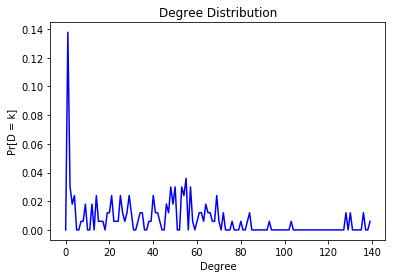

In [90]:
# Plot degree distribution
plot_degree_distribution(dict(G.degree).values())

ER random graph follows a binomial degree distribution and approaches a Poisson distribution when the
number of nodes N become infnite. A scale free network follows a power-law degree distribution
which means that they have a large number of nodes with a small degree and few nodes with a high degree.
Acording to the above figure, the  network is clearly closer to a power law distribution, thus a scale free network would be more appropriate to model this network.

3) What is the degree correlation (assortativity) ? What is its physical meaning?

In [91]:
# degree correlation
dac = nx.degree_assortativity_coefficient(G)



print("Degree correlation (assortativity): ", dac)
print("Clustering coefficient: ", av_c)

Degree correlation (assortativity):  -0.29517729789301855
Clustering coeffcient:  0.5918632085486949


The degree correlation of network G is almost equal to -0.30. Therefore, the network can be characterized
as disassortative, thus high degree nodes are more likely to be connected to lower degree nodes.

4) What is the clustering coefficient C?

In [92]:
# clustering coefficient 

C = nx.average_clustering(G)
print("Clustering coefficient: ", C)

Clustering coefficient:  0.5918632085486949


5) What is the average hopcount E[H] of the shortest paths between all node pairs? What is the diameter Hmax?

In [93]:
# Average hop count and Hmax 
EH = nx.average_shortest_path_length(G)
print("Average hop count: ", EH)  

Hmax = nx.diameter(G)
print("Diameter:\t" + str(Hmax))

Average hop count:  1.9673905201644903
Diameter:	5


6) Has this network the small-world property? Justify your conclusion quantitatively.

In [33]:
# small world coefficient

Sigma = nx.sigma(G, niter=10, nrand=1)
print("Small world coefficient (sigma): ", Sigma)

Small world coefficient (sigma):  0.9722495299614373


A network has the small-world property if the average distance(average hopcount) between the
nodes is small and the clustering coefficient is high. In order to reach a quantitative conclusion, the small world
coefficient-sigma was calculated. Following this process, a graph is commonly classiffied as small-world if sigma is
greater than one. For this purpose, the corresponding function from the networkx library was used to generate
5 random graphs with 30 rewirings per edge, which calculated sigma to be equal to 0.9742. If we were to take the
larger than one constraint on face value, the network would be classiffied as not having the small-world property.
However, since this number is very close to one, we believe like that there is no deffinitive conclusion to made.

7) What is the largest eigenvalue (spectral radius) lamda1 of the adjacency matrix?

In [94]:
# Spectral radius of the adjacency matrix

lambda1 = max(nx.adjacency_spectrum(G))
print("Spectral radius of the adjacency matrix: ", lambda1)

Spectral radius of the adjacency matrix:  (60.63926551053452+0j)


8) What is the second smallest eigenvalue of the Laplacian matrix (algebraic connectivity)?

In [96]:
# Algebraic connectivity

aC = nx.algebraic_connectivity(G)
print("Algebraic connectivity: ", aC)

Algebraic connectivity:  0.38107208179767


In [95]:
## helper function transfer in .py file 

def plot_degree_distribution(dd):

    import collections
    import matplotlib.pyplot as plt
    import numpy as np
    # Explicitly set degrees were no count to zero

    degree_sequence = sorted(dd, reverse=True)  # degree sequence
    degree_count = collections.Counter(degree_sequence)
    degree, count = zip(*degree_count.items())
    prob = [x/sum(count) for x in count] # Dividing each degree by count to obtain probability)
    # Finding which degree have zero count
    for i in range(139):
        if i not in degree:
            degree = list(degree)
            degree.append(i)
            prob = list(prob)
            prob.append(0)
            degree = tuple(degree)
            prob = tuple(prob)
    indexes = np.argsort(degree) # Finding the indexes with which to sort the probability list
    sortedDegree = sorted(degree)
    sortedProb = []
    # Recreating the probability list with the correct ordering
    for index in indexes:
        sortedProb.append(prob[index])
    # plt.plot(degree, prob)
    plt.plot(sortedDegree, sortedProb, 'b')
    plt.title("Degree Distribution")
    plt.ylabel("Pr[D = k]")
    plt.xlabel("Degree")
    plt.show()


### Part B: 

In [97]:
## helper functions tranfer to .py file 

def information_spreading(df, n):

    import matplotlib.pylab as plt

    I = {0: 1}
    V = {0: 1}

    for s in range(1, n):

        t = 1

        infected_t = [s]
        infected_t_prev = [s]

        for i in range(0, len(df.index)):

            if df.timestamp[i] == t:

                if df.node1[i] in infected_t_prev and df.node2[i] not in infected_t:
                    infected_t.append(df.node2[i])

                if df.node2[i] in infected_t_prev and df.node1[i] not in infected_t:
                    infected_t.append(df.node1[i])

            else:

                infected_t_prev = infected_t

                if t not in I:
                    I[t] = len(infected_t)
                else:
                    I[t] += len(infected_t)

                if t not in V:
                    V[t] = len(infected_t)**2
                else:
                    V[t] += len(infected_t)**2

                if df.node1[i] in infected_t_prev and df.node2[i] not in infected_t:
                    infected_t.append(df.node2[i])

                if df.node2[i] in infected_t_prev and df.node1[i] not in infected_t:
                    infected_t.append(df.node1[i])

                t += 1

    for k, v in I.items():
        I[k] = v/n

    for k, v in V.items():
        V[k] = (v/n - I[k]**2)**(1/2)

    # TODO: I = E[I(t)] | V = sqrt(Var(I(t)))

    lists = sorted(I.items())  # sorted by f, return a list of tuples (f,E[I(t)])
    x, y = zip(*lists)  # unpack a list of pairs into two tuples
    lists = sorted(V.items())  # sorted by f, return a list of tuples (f,Std])
    x, e = zip(*lists)

    plt.plot(x, y, color='r', label='Avg')
    plt.errorbar(x, y, yerr=e, ls='None', color='#b8c4cf', label='Std')
    plt.title('Plot of average of infected nodes and its error bar (std) over t')
    plt.xlabel('Time steps')
    plt.ylabel('# Infected Nodes')
    plt.legend(loc='lower right')
    plt.show()

9) Taking all the N iterations into count, plot the average number of infected nodes together with its error bar (standard deviation) as a function of the time step t.

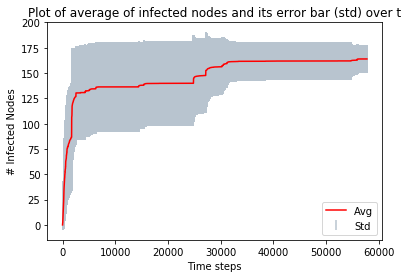

In [45]:
information_spreading(df, N)

## Part C 

In [51]:
from random import shuffle


def createG2_csv():
    df = pd.read_excel("manufacturing_emails_temporal_network.xlsx")

    timestamps = df.timestamp
    unique_timesteps = timestamps.unique()
    unique_timesteps_shuffled = unique_timesteps.copy()
    shuffle(unique_timesteps_shuffled)

    mapping = {}
    for index, base in enumerate(unique_timesteps):
        target = unique_timesteps_shuffled[index]
        mapping[base] = target

    def convert_to_target(base):
        return mapping[base]

    df['timestamp'] = df.timestamp.apply(convert_to_target)
    df.sort_values('timestamp', inplace=True)
    return df

In [47]:
def build_graph_from_dataset(dataset):
    flat_list = [item for sublist in dataset for item in sublist]
    tmp = list(map(list, zip(*flat_list)))
    unique_nodes = set(tmp[0] + tmp[1])

    g = nx.Graph()
    g.add_nodes_from(list(unique_nodes))
    g.add_edges_from([tuple(item) for sublist in dataset for item in sublist])
    return g, unique_nodes

In [54]:
g2 = createG2_csv()
g2.to_csv("./g2.csv", index=False)
#g2_data = load_network('./data/g2.json')


In [56]:

df1 = pd.read_csv('g2.csv')
G2 = nx.Graph()
for i in range(0, len(df1.index)):
    G2.add_node(df.node1[i])
    G2.add_node(df.node2[i])
    G2.add_edge(df.node1[i], df.node2[i])

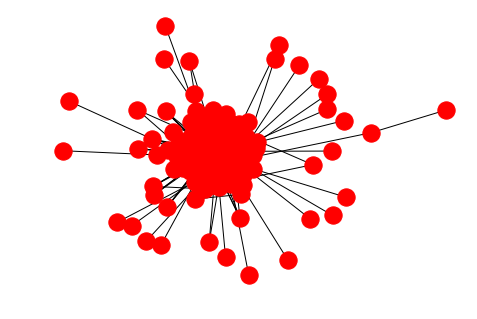

In [69]:
nx.draw(G2)
plt.show()

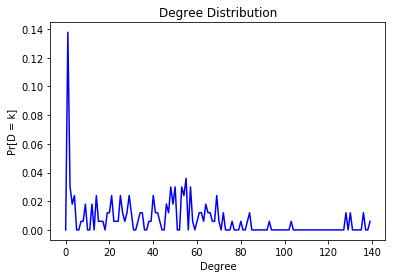

In [57]:
plot_degree_distribution(dict(G2.degree).values())

In [70]:
#Create G3 
def createG3(nodep, ts):
    import pandas as pd
    import random

    df = pd.DataFrame(columns=['node1', 'node2', 'timestamp'])

    for i in range(0, len(ts.index)):
        rnd = random.randint(0, len(nodep.index)-1)
        df = df.append({'node1': nodep    .node1[rnd], 'node2': nodep.node2[rnd], 'timestamp': ts.timestamp[i]}, ignore_index = True)

    df.to_excel("finalG3.xlsx")

In [73]:
#file = 'G3.xlsx'
file = pd.ExcelFile('manufacturing_emails_temporal_network.xlsx')
xl_file = pd.ExcelFile(file)
#
node_pairs = xl_file.parse('Sheet1')
timestamps = xl_file.parse('Sheet1')
#
createG3(node_pairs, timestamps)
# Betw = sorted(nx.betweenness_centrality(G).items(), key=lambda kv: kv[1], reverse=True)
# tdc = sorted(temporal_degree_centrality(xl_df).items(), key=lambda kv: kv[1], reverse=True)

In [75]:
file2 = 'finalG3.xlsx'

df2 = pd.read_excel(file2)
G3 = nx.Graph()
for i in range(0, len(df2.index)):
    G3.add_node(df.node1[i])
    G3.add_node(df.node2[i])
    G3.add_edge(df.node1[i], df.node2[i])


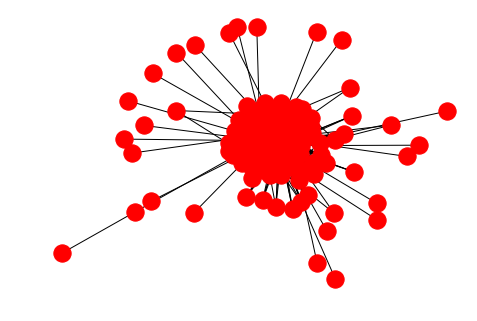

In [76]:
nx.draw(G3)
plt.show()

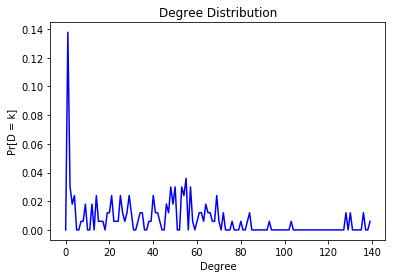

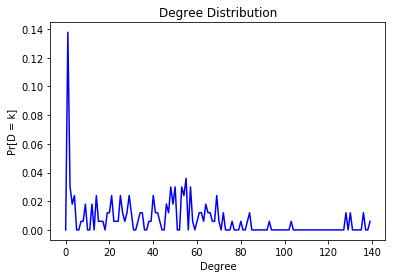

In [80]:
plot_degree_distribution(dict(G3.degree).values())
plot_degree_distribution(dict(G.degree).values())

In [88]:
print(timestamps)

       node1  node2  timestamp
0          1      2          1
1          1      3          1
2          1      4          1
3          1      5          1
4          1      6          1
5          1      7          1
6          1      8          1
7          1      9          1
8          1     10          1
9          1     11          1
10         1     12          1
11         1     13          1
12         1     14          1
13         1     15          1
14         1     16          1
15         1     17          1
16        18     19          2
17        18     19          3
18         3     20          4
19        20     21          5
20        20     22          6
21        20     23          7
22        24     25          8
23        26     27          9
24        28     29         10
25         1      7         11
26        29     30         12
27        28     29         13
28        11     31         14
29        11     32         14
...      ...    ...        ...
82846   

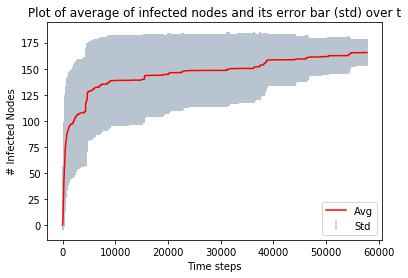

In [89]:
information_spreading(df1, N)